In [30]:
import pandas as pd
import pandana, time, os, pandas as pd, numpy as np
from pandana.loaders import osm
from shapely.geometry import Polygon, Point

In [123]:
import geopandas
import geojson 

polygons_df = geopandas.read_file(f'../geojson_files/dk_pop_100m_polygons.geojson')

polygons_df

,population_density,lon,lat,id,geometry
0,1.206668,10.600833,57.743333,0,"POLYGON ((10.60042 57.74292, 10.60125 57.74292..."
1,0.982903,10.601667,57.743333,1,"POLYGON ((10.60125 57.74292, 10.60208 57.74292..."
2,0.970523,10.633333,57.743333,2,"POLYGON ((10.63292 57.74292, 10.63375 57.74292..."
3,1.223284,10.630833,57.740833,3,"POLYGON ((10.63042 57.74042, 10.63125 57.74042..."
4,1.048370,10.595833,57.740000,4,"POLYGON ((10.59542 57.73958, 10.59625 57.73958..."
...,...,...,...,...,...
846588,0.870005,11.940833,54.569167,846588,"POLYGON ((11.94042 54.56875, 11.94125 54.56875..."
846589,0.815470,11.951667,54.569167,846589,"POLYGON ((11.95125 54.56875, 11.95208 54.56875..."
846590,0.536970,11.972500,54.568333,846590,"POLYGON ((11.97208 54.56792, 11.97292 54.56792..."
846591,0.565375,11.951667,54.565833,846591,"POLYGON ((11.95125 54.56542, 11.95208 54.56542..."


In [124]:
#poly_metadata_df = geopandas.read_file(f'dk_polygons_100m.json')

#poly_metadata_df

In [125]:
gdf = polygons_df

gdf

,population_density,lon,lat,id,geometry
0,1.206668,10.600833,57.743333,0,"POLYGON ((10.60042 57.74292, 10.60125 57.74292..."
1,0.982903,10.601667,57.743333,1,"POLYGON ((10.60125 57.74292, 10.60208 57.74292..."
2,0.970523,10.633333,57.743333,2,"POLYGON ((10.63292 57.74292, 10.63375 57.74292..."
3,1.223284,10.630833,57.740833,3,"POLYGON ((10.63042 57.74042, 10.63125 57.74042..."
4,1.048370,10.595833,57.740000,4,"POLYGON ((10.59542 57.73958, 10.59625 57.73958..."
...,...,...,...,...,...
846588,0.870005,11.940833,54.569167,846588,"POLYGON ((11.94042 54.56875, 11.94125 54.56875..."
846589,0.815470,11.951667,54.569167,846589,"POLYGON ((11.95125 54.56875, 11.95208 54.56875..."
846590,0.536970,11.972500,54.568333,846590,"POLYGON ((11.97208 54.56792, 11.97292 54.56792..."
846591,0.565375,11.951667,54.565833,846591,"POLYGON ((11.95125 54.56542, 11.95208 54.56542..."


#### This section creates the bounding box for searching for OSM data and adding it to the geojson file, currently it is not the entire country file, but rather a bbox of copenhagen which is used

In [9]:
margin = 0.000000000001
bbox_min_lon = polygons_df.lon.min() - margin
bbox_max_lon = polygons_df.lon.max() + margin

bbox_min_lat = polygons_df.lat.min() - margin
bbox_max_lat = polygons_df.lat.max() + margin


# doing it specifically for copenhagen here

bbox_min_lon = 12.3080 
bbox_max_lon = 12.7096

bbox_min_lat = 55.5416
bbox_max_lat = 55.7761

In [10]:
dk_bbox = [bbox_min_lon, bbox_min_lat, bbox_max_lon, bbox_max_lat]

dk_bbox

[12.308, 55.5416, 12.7096, 55.7761]

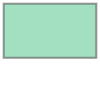

In [11]:
dk_bbox_polygon = Polygon([
                        [bbox_min_lon, bbox_min_lat],
                        [bbox_min_lon, bbox_max_lat],
                        [bbox_max_lon, bbox_max_lat],
                        [bbox_max_lon, bbox_min_lat],
                        [bbox_min_lon, bbox_min_lat]
                    ])
dk_bbox_polygon

In [126]:

temp_df =  polygons_df[polygons_df.geometry.within(dk_bbox_polygon)]

temp_df

,population_density,lon,lat,id,geometry
404935,6.256752,12.315833,55.775000,404935,"POLYGON ((12.31542 55.77458, 12.31625 55.77458..."
404936,6.607995,12.316667,55.775000,404936,"POLYGON ((12.31625 55.77458, 12.31708 55.77458..."
404937,6.797835,12.319167,55.775000,404937,"POLYGON ((12.31875 55.77458, 12.31958 55.77458..."
404938,6.738600,12.320000,55.775000,404938,"POLYGON ((12.31958 55.77458, 12.32042 55.77458..."
404939,6.722388,12.320833,55.775000,404939,"POLYGON ((12.32042 55.77458, 12.32125 55.77458..."
...,...,...,...,...,...
556543,1.806146,12.596667,55.557500,556543,"POLYGON ((12.59625 55.55708, 12.59708 55.55708..."
556872,2.767010,12.585833,55.556667,556872,"POLYGON ((12.58542 55.55625, 12.58625 55.55625..."
556873,2.241621,12.586667,55.556667,556873,"POLYGON ((12.58625 55.55625, 12.58708 55.55625..."
556874,2.739544,12.588333,55.556667,556874,"POLYGON ((12.58792 55.55625, 12.58875 55.55625..."


In [128]:
temp_df

,population_density,lon,lat,id,geometry
404935,6.256752,12.315833,55.775000,404935,"POLYGON ((12.31542 55.77458, 12.31625 55.77458..."
404936,6.607995,12.316667,55.775000,404936,"POLYGON ((12.31625 55.77458, 12.31708 55.77458..."
404937,6.797835,12.319167,55.775000,404937,"POLYGON ((12.31875 55.77458, 12.31958 55.77458..."
404938,6.738600,12.320000,55.775000,404938,"POLYGON ((12.31958 55.77458, 12.32042 55.77458..."
404939,6.722388,12.320833,55.775000,404939,"POLYGON ((12.32042 55.77458, 12.32125 55.77458..."
...,...,...,...,...,...
556543,1.806146,12.596667,55.557500,556543,"POLYGON ((12.59625 55.55708, 12.59708 55.55708..."
556872,2.767010,12.585833,55.556667,556872,"POLYGON ((12.58542 55.55625, 12.58625 55.55625..."
556873,2.241621,12.586667,55.556667,556873,"POLYGON ((12.58625 55.55625, 12.58708 55.55625..."
556874,2.739544,12.588333,55.556667,556874,"POLYGON ((12.58792 55.55625, 12.58875 55.55625..."


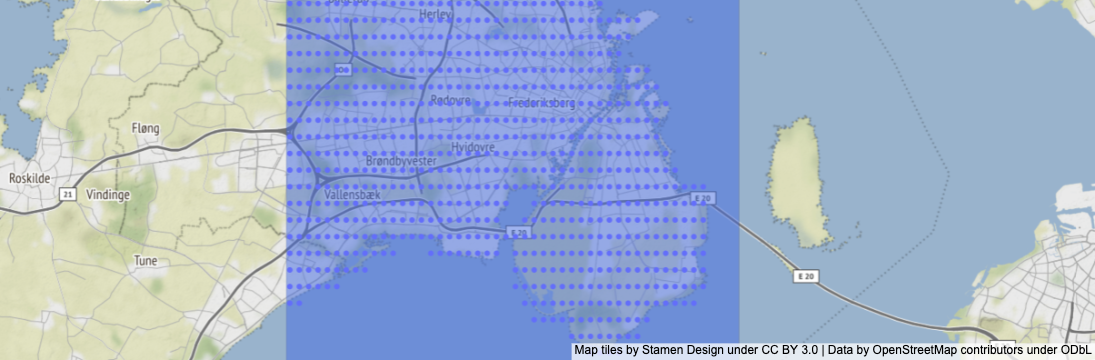

In [98]:
import plotly.express as px
 

#polygons_df["lon"] = polygons_df.geometry.x
#polygons_df["lat"] = polygons_df.geometry.y

px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(
        temp_df, 
        #pd.DataFrame({"lon":[0], "lat":[0]}),
        lon="lon", lat="lat", 
       # hover_data=["population_density"] + [f'avg_{ame}_dist' for ame in amenities],
       #size="population_density",
        #color='avg_bar_dist',
        color_continuous_scale="Viridis_r", #viridis reversed
        mapbox_style="outdoors",
    )

fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': { 'lon': bbox_min_lon + bbox_max_lon - bbox_min_lon, 'lat':  bbox_min_lat + bbox_max_lat - bbox_min_lat},
        'zoom': 4, 'layers': [{
            'source': {
                'type': "FeatureCollection",
                'features': [{
                    'type': "Feature",
                    'geometry': {
                        'type': "Polygon",
                        'coordinates': [[
                            [bbox_min_lon, bbox_min_lat],
                            [bbox_min_lon, bbox_max_lat],
                            [bbox_max_lon, bbox_max_lat],
                            [bbox_max_lon, bbox_min_lat],
                            [bbox_min_lon, bbox_min_lat],
                        ]]
                    }
                }]
            },
            'type': "fill", 'opacity': 0.5, 'below': "traces", 'color': "royalblue"}]},
    margin = {'l':0, 'r':0, 'b':0, 't':0})

## Iterate over the entire bbox of denmark by creating smaller bounding box

In [13]:
curr_bbox = dk_bbox_polygon

In [129]:
dk_bbox = [bbox_min_lon, bbox_min_lat, bbox_max_lon, bbox_max_lat]
#        curr_bbox = [lat, lon, lat+max_height, lon+max_width]
acc_df = getAccessibilityMeasures(bbox = [dk_bbox[1], dk_bbox[0], dk_bbox[3], dk_bbox[2]])

[55.5416, 12.308, 55.7761, 12.7096]
1,745 POIs loaded from CSV in 0.09 seconds
Network with 114,676 nodes loaded from HDF5 in 5.49 secs
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()


In [130]:
acc_df

,x,y,restaurant_distance,bar_distance,school_distance,toilets_distance,college_distance,hospital_distance
id,,,,,,,,
118725,12.562906,55.673985,95.097000,130.087997,162.432999,172.011002,1000.0,1000.0
118744,12.560034,55.661718,213.123001,639.276001,958.510986,132.541000,1000.0,1000.0
118759,12.553866,55.657275,859.354004,551.741028,1000.000000,1000.000000,1000.0,1000.0
118763,12.542231,55.654003,246.557999,246.557999,1000.000000,1000.000000,1000.0,1000.0
118764,12.542389,55.653946,258.287994,258.287994,1000.000000,1000.000000,1000.0,1000.0
...,...,...,...,...,...,...,...,...
9220714454,12.495532,55.732897,954.965027,1000.000000,1000.000000,1000.000000,1000.0,1000.0
9220714455,12.495603,55.732942,948.232971,1000.000000,1000.000000,1000.000000,1000.0,1000.0
9220714467,12.496371,55.735019,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0


In [131]:
acc_df.isnull().sum()

x                      0
y                      0
restaurant_distance    0
bar_distance           0
school_distance        0
toilets_distance       0
college_distance       0
hospital_distance      0
dtype: int64

In [22]:
df = acc_df.fillna(1000)

In [23]:
df

,x,y,restaurant_distance,bar_distance,school_distance,toilets_distance,hospital_distance,college_distance
id,,,,,,,,
697428,12.347575,55.597827,524.836975,1000.000000,1000.0,910.924988,1000.0,1000.0
697430,12.357365,55.607552,944.416016,712.286011,1000.0,969.078003,1000.0,1000.0
697433,12.376276,55.616301,1000.000000,830.390991,1000.0,755.312012,1000.0,1000.0
697438,12.391303,55.628494,798.846985,1000.000000,1000.0,1000.000000,1000.0,1000.0
697445,12.336544,55.621936,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.0
...,...,...,...,...,...,...,...,...
4445861418,12.747006,55.664862,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.0
4445884568,12.741745,55.667240,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.0
4445884575,12.741273,55.667273,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.0


In [24]:
df.isnull().sum()

x                      0
y                      0
restaurant_distance    0
bar_distance           0
school_distance        0
toilets_distance       0
hospital_distance      0
college_distance       0
dtype: int64

In [25]:
df[df.isna().any(axis=1)]

,x,y,restaurant_distance,bar_distance,school_distance,toilets_distance,hospital_distance,college_distance
id,,,,,,,,


In [132]:
gdf = gdf[gdf.within(dk_bbox_polygon)]
gdf

,population_density,lon,lat,id,geometry
404935,6.256752,12.315833,55.775000,404935,"POLYGON ((12.31542 55.77458, 12.31625 55.77458..."
404936,6.607995,12.316667,55.775000,404936,"POLYGON ((12.31625 55.77458, 12.31708 55.77458..."
404937,6.797835,12.319167,55.775000,404937,"POLYGON ((12.31875 55.77458, 12.31958 55.77458..."
404938,6.738600,12.320000,55.775000,404938,"POLYGON ((12.31958 55.77458, 12.32042 55.77458..."
404939,6.722388,12.320833,55.775000,404939,"POLYGON ((12.32042 55.77458, 12.32125 55.77458..."
...,...,...,...,...,...
556543,1.806146,12.596667,55.557500,556543,"POLYGON ((12.59625 55.55708, 12.59708 55.55708..."
556872,2.767010,12.585833,55.556667,556872,"POLYGON ((12.58542 55.55625, 12.58625 55.55625..."
556873,2.241621,12.586667,55.556667,556873,"POLYGON ((12.58625 55.55625, 12.58708 55.55625..."
556874,2.739544,12.588333,55.556667,556874,"POLYGON ((12.58792 55.55625, 12.58875 55.55625..."


### Create the dataframe that will hold both population density and accessibility measures

In [265]:
amenities = ['restaurant', 'bar', 'school', 'toilets', 'college', 'hospital']#, 'hospital']

#all_df = pd.DataFrame({})

all_df = geopandas.GeoDataFrame(gdf[["lon", "lat", "population_density", "id", "geometry"]], geometry="geometry")

all_df["osm_node_count"] = 0

for ame in amenities:
    all_df[f'acc_{ame}_dist'] = 0

all_df.sindex    
    
all_df

,lon,lat,population_density,id,geometry,osm_node_count,acc_restaurant_dist,acc_bar_dist,acc_school_dist,acc_toilets_dist,acc_college_dist,acc_hospital_dist
404935,12.315833,55.775000,6.256752,404935,"POLYGON ((12.31542 55.77458, 12.31625 55.77458...",0,0,0,0,0,0,0
404936,12.316667,55.775000,6.607995,404936,"POLYGON ((12.31625 55.77458, 12.31708 55.77458...",0,0,0,0,0,0,0
404937,12.319167,55.775000,6.797835,404937,"POLYGON ((12.31875 55.77458, 12.31958 55.77458...",0,0,0,0,0,0,0
404938,12.320000,55.775000,6.738600,404938,"POLYGON ((12.31958 55.77458, 12.32042 55.77458...",0,0,0,0,0,0,0
404939,12.320833,55.775000,6.722388,404939,"POLYGON ((12.32042 55.77458, 12.32125 55.77458...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
556543,12.596667,55.557500,1.806146,556543,"POLYGON ((12.59625 55.55708, 12.59708 55.55708...",0,0,0,0,0,0,0
556872,12.585833,55.556667,2.767010,556872,"POLYGON ((12.58542 55.55625, 12.58625 55.55625...",0,0,0,0,0,0,0
556873,12.586667,55.556667,2.241621,556873,"POLYGON ((12.58625 55.55625, 12.58708 55.55625...",0,0,0,0,0,0,0
556874,12.588333,55.556667,2.739544,556874,"POLYGON ((12.58792 55.55625, 12.58875 55.55625...",0,0,0,0,0,0,0


### Create a geoseries from the OSM nodes and add a spatial index so we can search fast later

In [134]:
s2 = geopandas.GeoSeries([Point(x,y) for (x,y) in df[["x", "y"]].values])


s2.sindex

rtree.index.Index(bounds=[12.2985868, 55.5597977, 12.7501508, 55.845643], size=135710)

### Go through each polygon in the bbox of the calcuation, and accumulate the distance for each points within that polygon

In [266]:
import time

size = len(all_df)
start_time = time.time()

all_df_columns = all_df.columns.tolist()

for i, poly in enumerate(all_df["geometry"].values):
    # query spatial index, to find osm nodes inside "poly"
    results = s2.sindex.query(poly)
    
    if i % 10 == 0:
        print(f'{i} of {size}', end='\r')
        
    # found osm nodes that are inside polygon
    if len(results) > 0:
        
        poly_row = all_df.iloc[i]
        
        # update row with values from osm nodes found from query
        for col_i, ame in enumerate(amenities):
            col_index = all_df_columns.index(f'acc_{ame}_dist')
            all_df.iloc[i, col_index] = poly_row[f'acc_{ame}_dist'] + df.iloc[results][f'{ame}_distance'].sum()
        
        col_index = all_df_columns.index("osm_node_count")
        all_df.iloc[i, col_index] = len(results)

        
print(f'Time taken: {time.time() - start_time}')
        

Time taken: 225.11213517189026


In [267]:
all_df

,lon,lat,population_density,id,geometry,osm_node_count,acc_restaurant_dist,acc_bar_dist,acc_school_dist,acc_toilets_dist,acc_college_dist,acc_hospital_dist
404935,12.315833,55.775000,6.256752,404935,"POLYGON ((12.31542 55.77458, 12.31625 55.77458...",0,0.0,0.0,0.0,0.0,0.0,0.0
404936,12.316667,55.775000,6.607995,404936,"POLYGON ((12.31625 55.77458, 12.31708 55.77458...",1,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
404937,12.319167,55.775000,6.797835,404937,"POLYGON ((12.31875 55.77458, 12.31958 55.77458...",2,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
404938,12.320000,55.775000,6.738600,404938,"POLYGON ((12.31958 55.77458, 12.32042 55.77458...",8,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0
404939,12.320833,55.775000,6.722388,404939,"POLYGON ((12.32042 55.77458, 12.32125 55.77458...",4,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
556543,12.596667,55.557500,1.806146,556543,"POLYGON ((12.59625 55.55708, 12.59708 55.55708...",0,0.0,0.0,0.0,0.0,0.0,0.0
556872,12.585833,55.556667,2.767010,556872,"POLYGON ((12.58542 55.55625, 12.58625 55.55625...",0,0.0,0.0,0.0,0.0,0.0,0.0
556873,12.586667,55.556667,2.241621,556873,"POLYGON ((12.58625 55.55625, 12.58708 55.55625...",0,0.0,0.0,0.0,0.0,0.0,0.0
556874,12.588333,55.556667,2.739544,556874,"POLYGON ((12.58792 55.55625, 12.58875 55.55625...",0,0.0,0.0,0.0,0.0,0.0,0.0


### Now calculate average distances for each amenity

In [268]:
for ame in amenities:
    all_df[f'avg_{ame}_dist'] = all_df[f'acc_{ame}_dist']/all_df["osm_node_count"]

In [269]:
all_df

,lon,lat,population_density,id,geometry,osm_node_count,acc_restaurant_dist,acc_bar_dist,acc_school_dist,acc_toilets_dist,acc_college_dist,acc_hospital_dist,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist
404935,12.315833,55.775000,6.256752,404935,"POLYGON ((12.31542 55.77458, 12.31625 55.77458...",0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
404936,12.316667,55.775000,6.607995,404936,"POLYGON ((12.31625 55.77458, 12.31708 55.77458...",1,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
404937,12.319167,55.775000,6.797835,404937,"POLYGON ((12.31875 55.77458, 12.31958 55.77458...",2,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
404938,12.320000,55.775000,6.738600,404938,"POLYGON ((12.31958 55.77458, 12.32042 55.77458...",8,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
404939,12.320833,55.775000,6.722388,404939,"POLYGON ((12.32042 55.77458, 12.32125 55.77458...",4,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556543,12.596667,55.557500,1.806146,556543,"POLYGON ((12.59625 55.55708, 12.59708 55.55708...",0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
556872,12.585833,55.556667,2.767010,556872,"POLYGON ((12.58542 55.55625, 12.58625 55.55625...",0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
556873,12.586667,55.556667,2.241621,556873,"POLYGON ((12.58625 55.55625, 12.58708 55.55625...",0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
556874,12.588333,55.556667,2.739544,556874,"POLYGON ((12.58792 55.55625, 12.58875 55.55625...",0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
all_df

,lon,lat,population_density,id,geometry,osm_node_count,acc_restaurant_dist,acc_bar_dist,acc_school_dist,acc_toilets_dist,acc_college_dist,acc_hospital_dist,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist
404935,12.315833,55.775000,6.256752,404935,"POLYGON ((12.31542 55.77458, 12.31625 55.77458...",0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
404936,12.316667,55.775000,6.607995,404936,"POLYGON ((12.31625 55.77458, 12.31708 55.77458...",1,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
404937,12.319167,55.775000,6.797835,404937,"POLYGON ((12.31875 55.77458, 12.31958 55.77458...",2,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
404938,12.320000,55.775000,6.738600,404938,"POLYGON ((12.31958 55.77458, 12.32042 55.77458...",8,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
404939,12.320833,55.775000,6.722388,404939,"POLYGON ((12.32042 55.77458, 12.32125 55.77458...",4,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556543,12.596667,55.557500,1.806146,556543,"POLYGON ((12.59625 55.55708, 12.59708 55.55708...",0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
556872,12.585833,55.556667,2.767010,556872,"POLYGON ((12.58542 55.55625, 12.58625 55.55625...",0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
556873,12.586667,55.556667,2.241621,556873,"POLYGON ((12.58625 55.55625, 12.58708 55.55625...",0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
556874,12.588333,55.556667,2.739544,556874,"POLYGON ((12.58792 55.55625, 12.58875 55.55625...",0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


### export to csv

In [438]:
#all_df.to_csv("../csv_files/cph_pop_and_access_100m.csv")

all_df.to_file("../cph_snippet_100m_clean4.json", driver="GeoJSON") 

### Plot the newly acquired dataset which has population density and accessibility measures

In [439]:
all_df.isna().sum()

lon                    0
lat                    0
population_density     0
id                     0
geometry               0
osm_node_count         0
acc_restaurant_dist    0
acc_bar_dist           0
acc_school_dist        0
acc_toilets_dist       0
acc_college_dist       0
acc_hospital_dist      0
avg_restaurant_dist    0
avg_bar_dist           0
avg_school_dist        0
avg_toilets_dist       0
avg_college_dist       0
avg_hospital_dist      0
dtype: int64

### Since some of the polygons have no OSM nodes inside, here we find the nearest amenity by birds flights and set that to be the average accessibility distance

In [142]:
# iterate through bbox by smaller bbox and get all pois for bbox.

from PandanaHandler import getPOIs
importlib.reload(sys.modules['PandanaHandler'])
from PandanaHandler import getPOIs

pois_df = getPOIs(bbox = [dk_bbox[1], dk_bbox[0], dk_bbox[3], dk_bbox[2]])

pois_df

,lat,lon,amenity,cuisine,fvst:navnelbnr,microbrewery,name,opening_hours,phone,website,...,lgbtq,grades,name:da,instagram,undefined,webshop,drink:cider,drink:gin,drink:cocktails,product
0,55.690217,12.563907,restaurant,regional,114128.0,yes,Nørrebro Bryghus Restaurant,"Mo-Th 12:00-15:00,17:30-22:00; Fr-Sa 12:00-15:...",+45 35300530,https://noerrebrobryghus.dk/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55.686489,12.587433,bar,NaN,501959.0,NaN,Black Swan,"Mo-We 15:00-01:00, Th-Sa 15:00-02:00, Su 15:00...",NaN,http://www.blackswanbar.dk/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55.721847,12.523148,toilets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55.650133,12.611974,restaurant,regional,114043.0,NaN,Ingolfs Kaffebar,Mo-Tu 10:00-22:00; We-Sa 10:00-24:00; Su 10:00...,+45 32599596,http://www.ingolfskaffebar.dk/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55.684461,12.559480,restaurant,thai,713340.0,NaN,Thai Pan,16:30-22:00,+45 35360505,http://www.thaipan.dk/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,55.674795,12.605388,toilets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1741,55.682334,12.571774,bar,NaN,989121.0,NaN,F2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1742,55.684070,12.485957,restaurant,sushi,1115388.0,NaN,Proud sushi,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1743,55.674995,12.566437,restaurant,regional,1116424.0,NaN,Feed Bistro,17:00-21:00; Fr-Sa 17:00-22:00,+45 69156987,https://feed.dk/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
all_df[all_df['osm_node_count'] == 0].head(1)

,lon,lat,population_density,id,geometry,osm_node_count,acc_restaurant_dist,acc_bar_dist,acc_school_dist,acc_toilets_dist,acc_college_dist,acc_hospital_dist,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist
404935,12.315833,55.775,6.256752,404935,"POLYGON ((12.31542 55.77458, 12.31625 55.77458...",0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning the polygons missing OSM nodes by taking the adjacent polygons distance 

In [248]:
import math
from GeodataHelper import haversine

row = all_df[all_df.osm_node_count == 0].head(1)

dist_between_adjacent_polygons = 0.0008333333301138168

def approximately(a,b, threshold = 0.000001):
    return abs(b - a) <= threshold

size = len(all_df[all_df.osm_node_count == 0].index)

for c, row in enumerate(all_df[all_df.osm_node_count == 0][["lon", "lat", "id"]].values):
    lon = row[0]
    lat = row[1]
    i = row[2]
    
    if c % 10 == 0:
        print(f'{c} of {size}', end='\r')
        
    # right neighbour (r_n)
    p1 = Point(lon + dist_between_adjacent_polygons, lat)
    r_n_dist = all_df.sindex.query(p1, predicate="within")
    
    # left neighbour (l_n)
    p2 = Point(lon - dist_between_adjacent_polygons, lat)
    l_n_dist = all_df.sindex.query(p2, predicate="within")
    
    # top neighbour (t_n)
    p3 = Point(lon, lat - dist_between_adjacent_polygons)
    t_n_dist = all_df.sindex.query(p3, predicate="within")
    
    # bottom neighbour (b_n)
    p4 = Point(lon, lat + dist_between_adjacent_polygons)
    b_n_dist = all_df.sindex.query(p4, predicate="within")
    
    lst = r_n_dist.tolist() + l_n_dist.tolist() + t_n_dist.tolist() + b_n_dist.tolist()
    
    if len(lst) == 0: 
        continue
    # get all rows with id from lst
    tmp = all_df.iloc[lst]
    # filter out all polygons with no osm nodes
    tmp = tmp[tmp.osm_node_count > 0]
   
    if len(tmp.index) == 0:
        continue
        
    # if the polygon has "valid" adjacent polygons then take their avg_dist and plus with avg distance to those polygons
    # birds flight style

    avg_dst = (tmp.apply(lambda row: haversine(row.lon, row.lat, lon, lat), axis=1).sum() / len(tmp.index)) * 1000
    
    for ame in amenities:
        all_df.loc[i, f'avg_{ame}_dist'] = (tmp[f'avg_{ame}_dist'].sum() / len(tmp.index)) + avg_dst
    
    
all_df


,lon,lat,population_density,id,geometry,osm_node_count,acc_restaurant_dist,acc_bar_dist,acc_school_dist,acc_toilets_dist,acc_college_dist,acc_hospital_dist,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist
404935,12.315833,55.775000,6.256752,404935,"POLYGON ((12.31542 55.77458, 12.31625 55.77458...",0,0.0,0.0,0.0,0.0,0.0,0.0,1052.117452,1052.117452,1052.117452,1052.117452,1052.117452,1052.117452
404936,12.316667,55.775000,6.607995,404936,"POLYGON ((12.31625 55.77458, 12.31708 55.77458...",1,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
404937,12.319167,55.775000,6.797835,404937,"POLYGON ((12.31875 55.77458, 12.31958 55.77458...",2,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
404938,12.320000,55.775000,6.738600,404938,"POLYGON ((12.31958 55.77458, 12.32042 55.77458...",8,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
404939,12.320833,55.775000,6.722388,404939,"POLYGON ((12.32042 55.77458, 12.32125 55.77458...",4,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556543,12.596667,55.557500,1.806146,556543,"POLYGON ((12.59625 55.55708, 12.59708 55.55708...",0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
556872,12.585833,55.556667,2.767010,556872,"POLYGON ((12.58542 55.55625, 12.58625 55.55625...",0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
556873,12.586667,55.556667,2.241621,556873,"POLYGON ((12.58625 55.55625, 12.58708 55.55625...",0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
556874,12.588333,55.556667,2.739544,556874,"POLYGON ((12.58792 55.55625, 12.58875 55.55625...",0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [440]:
all_df.isna().sum(axis=0)

lon                    0
lat                    0
population_density     0
id                     0
geometry               0
osm_node_count         0
acc_restaurant_dist    0
acc_bar_dist           0
acc_school_dist        0
acc_toilets_dist       0
acc_college_dist       0
acc_hospital_dist      0
avg_restaurant_dist    0
avg_bar_dist           0
avg_school_dist        0
avg_toilets_dist       0
avg_college_dist       0
avg_hospital_dist      0
dtype: int64

In [323]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

dct = {ame: MultiPoint([Point(row[0], row[1]) for row in pois_df[pois_df.amenity == ame][["lon","lat"]].values]) for ame in amenities}



for ame in amenities:
    orig = Point(12.588333, 55.556667)
    nearest = nearest_points(orig, dct[ame])[1]
    print(nearest)

POINT (12.592988 55.5714985)
POINT (12.5859393 55.6029118)
POINT (12.6141227 55.6227549)
POINT (12.5943728 55.5666491)
POINT (12.5361877 55.6642899)
POINT (12.5257885 55.6872847)


In [329]:
from GeodataHelper import haversine


def getDistancesToNearestPois(row,ame):
#    for ame in amenities:
    if row.osm_node_count > 0:
        return row[f'avg_{ame}_dist']
    
    orig = Point(row.lon, row.lat)
    nearest = nearest_points(orig, dct[ame])[1]
    return min(haversine(row.lon, row.lat, nearest.x, nearest.y) * 1000, 1000)
        

for ame in amenities:
    print(ame)
    all_df[[f'avg_{ame}_dist']] = all_df.apply(lambda row: getDistancesToNearestPois(row, ame), axis = 1)

all_df

restaurant
bar
school
toilets
college
hospital


,lon,lat,population_density,id,geometry,osm_node_count,acc_restaurant_dist,acc_bar_dist,acc_school_dist,acc_toilets_dist,acc_college_dist,acc_hospital_dist,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist
404935,12.315833,55.775000,6.256752,404935,"POLYGON ((12.31542 55.77458, 12.31625 55.77458...",0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
404936,12.316667,55.775000,6.607995,404936,"POLYGON ((12.31625 55.77458, 12.31708 55.77458...",1,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
404937,12.319167,55.775000,6.797835,404937,"POLYGON ((12.31875 55.77458, 12.31958 55.77458...",2,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
404938,12.320000,55.775000,6.738600,404938,"POLYGON ((12.31958 55.77458, 12.32042 55.77458...",8,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
404939,12.320833,55.775000,6.722388,404939,"POLYGON ((12.32042 55.77458, 12.32125 55.77458...",4,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556543,12.596667,55.557500,1.806146,556543,"POLYGON ((12.59625 55.55708, 12.59708 55.55708...",0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
556872,12.585833,55.556667,2.767010,556872,"POLYGON ((12.58542 55.55625, 12.58625 55.55625...",0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
556873,12.586667,55.556667,2.241621,556873,"POLYGON ((12.58625 55.55625, 12.58708 55.55625...",0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
556874,12.588333,55.556667,2.739544,556874,"POLYGON ((12.58792 55.55625, 12.58875 55.55625...",0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0


In [331]:
all_df[all_df.osm_node_count == 0].avg_bar_dist.max()

1000.0

In [334]:
all_df.isna().sum(axis=1)

404935    0
404936    0
404937    0
404938    0
404939    0
         ..
556543    0
556872    0
556873    0
556874    0
556875    0
Length: 59900, dtype: int64

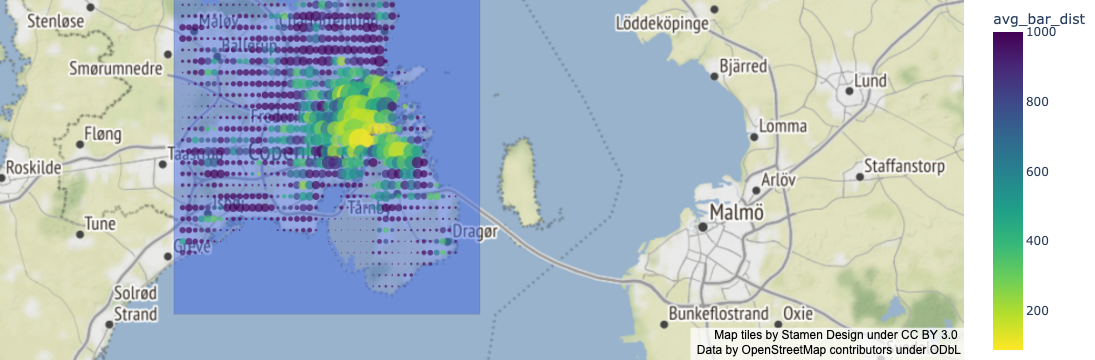

In [113]:
import plotly.express as px
 

#polygons_df["lon"] = polygons_df.geometry.x
#polygons_df["lat"] = polygons_df.geometry.y

px.set_mapbox_access_token(open("../.mapbox_token").read())
fig = px.scatter_mapbox(
        all_df, 
        #pd.DataFrame({"lon":[0], "lat":[0]}),
        lon="lon", lat="lat", 
       # hover_data=["population_density"] + [f'avg_{ame}_dist' for ame in amenities],
        size="population_density",
        color='avg_bar_dist',
        color_continuous_scale="Viridis_r", #viridis reversed
        mapbox_style="outdoors",
    )

fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': { 'lon': bbox_min_lon + bbox_max_lon - bbox_min_lon, 'lat':  bbox_min_lat + bbox_max_lat - bbox_min_lat},
        'zoom': 4, 'layers': [{
            'source': {
                'type': "FeatureCollection",
                'features': [{
                    'type': "Feature",
                    'geometry': {
                        'type': "Polygon",
                        'coordinates': [[
                            [bbox_min_lon, bbox_min_lat],
                            [bbox_min_lon, bbox_max_lat],
                            [bbox_max_lon, bbox_max_lat],
                            [bbox_max_lon, bbox_min_lat],
                            [bbox_min_lon, bbox_min_lat],
                        ]]
                    }
                }]
            },
            'type': "fill", 'opacity': 0.5, 'below': "traces", 'color': "royalblue"}]},
    margin = {'l':0, 'r':0, 'b':0, 't':0})

In [116]:
dk_bbox = [bbox_min_lon, bbox_min_lat, bbox_max_lon, bbox_max_lat]
#        curr_bbox = [lat, lon, lat+max_height, lon+max_width]
test = getAccessibilityMeasures(bbox = [dk_bbox[1], dk_bbox[0], dk_bbox[3], dk_bbox[2]])

[55.5416, 12.308, 55.7761, 12.7096]
1,745 POIs downloaded from OSM in 4.33 seconds
Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](55.54160000,12.30800000,55.77610000,12.70960000);>;);out;'}"


/opt/anaconda3/lib/python3.8/site-packages/osmnet/load.py:445: FutureWarning:

Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.

/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Downloaded 48,944.5KB from www.overpass-api.de in 8.77 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 10.02 seconds
Returning OSM data with 309,095 nodes and 85,360 ways...
Edge node pairs completed. Took 96.37 seconds
Returning processed graph with 114,917 nodes and 160,669 edges...
Completed OSM data download and Pandana node and edge table creation in 112.29 seconds
Network with 114,917 nodes downloaded from OSM in 120.27 secs
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()


In [117]:
test

,x,y,restaurant_distance,bar_distance,school_distance,toilets_distance,college_distance,hospital_distance
id,,,,,,,,
118725,12.562906,55.673985,95.097000,130.087997,162.432999,172.011002,1000.0,1000.0
118744,12.560034,55.661718,213.123001,639.276001,958.510986,132.541000,1000.0,1000.0
118759,12.553866,55.657275,859.354004,551.741028,1000.000000,1000.000000,1000.0,1000.0
118763,12.542231,55.654003,246.557999,246.557999,1000.000000,1000.000000,1000.0,1000.0
118764,12.542389,55.653946,258.287994,258.287994,1000.000000,1000.000000,1000.0,1000.0
...,...,...,...,...,...,...,...,...
9220714454,12.495532,55.732897,954.965027,1000.000000,1000.000000,1000.000000,1000.0,1000.0
9220714455,12.495603,55.732942,948.232971,1000.000000,1000.000000,1000.000000,1000.0,1000.0
9220714467,12.496371,55.735019,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0


In [433]:
size = len(all_df[(all_df.osm_node_count == 0)].index)

valid_polygons = MultiPoint([Point(row[0], row[1]) for row in all_df[(all_df.osm_node_count > 0)].values])

size = len(all_df[all_df.osm_node_count == 0].index)

for i, row in enumerate(all_df[all_df.osm_node_count == 0][["id", "lon","lat"]].values):
    if i % 10 == 0:
        print(f'{i} of {size}', end='\r')
        
    row_id = row[0]
    lon = row[1]
    lat = row[2]
    
    p = Point(lon, lat)
    nearest_p = nearest_points(p, valid_polygons)[1]
    nearest_poly = all_df[(all_df.lon == nearest_p.x) & (all_df.lat == nearest_p.y)].head(1)
    #print(lon, lat, nearest_poly.lon.values[0], nearest_poly.lat.values[0])
    dst = haversine(lon, lat, nearest_poly.lon.values[0], nearest_poly.lat.values[0]) * 1000
#    print(row_id, nearest_poly.id.values[0])
#    break
    for ame in amenities:
        all_df.loc[row_id, f'avg_{ame}_dist'] = nearest_poly[f'avg_{ame}_dist'].values[0] + dst



    #all_df[(all_df.osm_node_count != 0)].distance(p).sort_values().index[0]

In [437]:
all_df[all_df.osm_node_count == 0]["avg_restaurant_dist"].mean()

884.9596211352882

In [422]:
all_df[(all_df.id > 404935)&(all_df.id < 411300)]

,lon,lat,population_density,id,geometry,osm_node_count,acc_restaurant_dist,acc_bar_dist,acc_school_dist,acc_toilets_dist,acc_college_dist,acc_hospital_dist,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist
404936,12.316667,55.775000,6.607995,404936,"POLYGON ((12.31625 55.77458, 12.31708 55.77458...",1,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
404937,12.319167,55.775000,6.797835,404937,"POLYGON ((12.31875 55.77458, 12.31958 55.77458...",2,2000.000000,2000.0,2000.0,2000.0,2000.0,2000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
404938,12.320000,55.775000,6.738600,404938,"POLYGON ((12.31958 55.77458, 12.32042 55.77458...",8,8000.000000,8000.0,8000.0,8000.0,8000.0,8000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
404939,12.320833,55.775000,6.722388,404939,"POLYGON ((12.32042 55.77458, 12.32125 55.77458...",4,4000.000000,4000.0,4000.0,4000.0,4000.0,4000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
404940,12.321667,55.775000,7.053303,404940,"POLYGON ((12.32125 55.77458, 12.32208 55.77458...",4,4000.000000,4000.0,4000.0,4000.0,4000.0,4000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411295,12.350833,55.763333,8.202147,411295,"POLYGON ((12.35042 55.76292, 12.35125 55.76292...",2,1933.153992,2000.0,2000.0,2000.0,2000.0,2000.0,966.576996,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
411296,12.351667,55.763333,7.745530,411296,"POLYGON ((12.35125 55.76292, 12.35208 55.76292...",4,3940.146973,4000.0,4000.0,4000.0,4000.0,4000.0,985.036743,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
411297,12.365833,55.763333,5.749682,411297,"POLYGON ((12.36542 55.76292, 12.36625 55.76292...",0,0.000000,0.0,0.0,0.0,0.0,0.0,1940.929498,2511.858484,2511.858484,2511.858484,2511.858484,2511.858484
411298,12.381667,55.763333,5.806300,411298,"POLYGON ((12.38125 55.76292, 12.38208 55.76292...",0,0.000000,0.0,0.0,0.0,0.0,0.0,950.401528,1521.330514,1521.330514,1521.330514,1521.330514,1521.330514


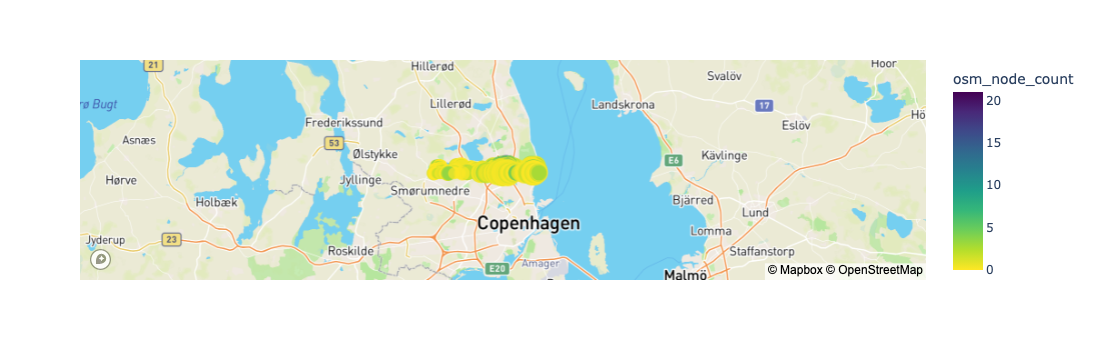

In [430]:
import plotly.express as px
 

#polygons_df["lon"] = polygons_df.geometry.x
#polygons_df["lat"] = polygons_df.geometry.y

px.set_mapbox_access_token(open("../.mapbox_token").read())
fig = px.scatter_mapbox(
        all_df[(all_df.id >= 404935)&(all_df.id < 411300)], 
        #all_df.loc[[404935, 411300]],
        #pd.DataFrame({"lon":[0], "lat":[0]}),
        lon="lon", lat="lat", 
        hover_data=["osm_node_count", "id"],
        size="population_density",
        color='osm_node_count',
        color_continuous_scale="Viridis_r", #viridis reversed
        mapbox_style="outdoors",
    )

fig.show()